In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [4]:

from sklearn.metrics import f1_score

In [2]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 35.9 MB/s eta 0:00:0000:0100:01


In [5]:
def cm_plot(y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred)
    # Normalise
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cmn, cmap='Blues', annot=True, fmt='.2f')
    sns.set(font_scale=1.3)
    plt.title("Confusion Matrix")

    return plt.show()

In [11]:
X_train = np.load("/kaggle/input/neymark-tsc/train_x.npy")
y_train = np.load("/kaggle/input/neymark-tsc/train_y.npy")
X_test_real = np.load("/kaggle/input/neymark-tsc/test_x.npy")

In [12]:
X_train.shape

(14667, 187)

In [13]:
X_test_real.shape

(7225, 187)

In [14]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [17]:
#Чекала как модель ведет себя. F1_score = 0.8770
from sktime.classification.deep_learning.lstmfcn import LSTMFCNClassifier

network = LSTMFCNClassifier(n_epochs=1000, verbose=0)
network.fit(X_train, y_train)
y_pred = network.predict(X_test)
f1_score(y_test, y_pred, average="macro")

LSTMFCNClassifier(callbacks=[], n_epochs=1000)

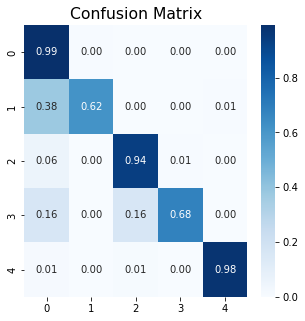

In [20]:
cm_plot(y_test, y_pred)

In [15]:
from sktime.classification.kernel_based import RocketClassifier
from sktime.transformations.series.exponent import ExponentTransformer

In [20]:
#Чекала как модель ведет себя. F1_score = 0.8837
square = ExponentTransformer(power=2)
rocket = RocketClassifier(num_kernels=2000)
pipe_sktime = square * rocket

pipe_sktime.fit(X_train, y_train)
y_pred = pipe_sktime.predict(X_test)
f1_score(y_test, y_pred, average="macro")


0.8837837621189621

In [16]:

square = ExponentTransformer(power=2)
rocket = RocketClassifier(num_kernels=2000)
pipe_sktime = square * rocket

pipe_sktime.fit(X_train, y_train)
y_pred = pipe_sktime.predict(X_test_real)


In [17]:
# y_pred_csv = pd.DataFrame(list(range(len(y_pred))), columns=["Id"])
y_pred_csv = pd.DataFrame()
y_pred_csv["ID"] = np.array(range(len(y_pred))).astype(int).astype(str)
y_pred_csv["Answer"] = np.array(y_pred).astype(int).astype(str)
y_pred_csv.to_csv("testing_submission.csv", index=False)
y_pred_csv

,ID,Answer
0,0,0
1,1,0
2,2,0
3,3,2
4,4,0
...,...,...
7220,7220,0
7221,7221,2
7222,7222,0
7223,7223,0


In [ ]:
rtyur